# Extract Data

In [ ]:
import pandas as pd

train = pd.read_csv('train.csv')

In [ ]:
test = pd.read_csv('test.csv')
test_labels = pd.read_csv('test_labels.csv')

# keep only rows that were actually scored (i.e. toxic != -1)
valid_idx = test_labels['toxic'] != -1

test_comments = test.loc[valid_idx].reset_index(drop=True)
test_labels = test_labels.loc[valid_idx].reset_index(drop=True)


In [ ]:
label_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

### Data info

In [ ]:
print("\n Shape of the data: \n")
print("Train",train.shape)
print("Test comments",test_comments.shape)
print("Test labels",test_labels.shape)


 Shape of the data: 

Train (159571, 8)
Test comments (63978, 2)
Test labels (63978, 7)


In [ ]:
train.head(2)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0


In [ ]:
test_comments.head(3)

,id,comment_text
0,0001ea8717f6de06,Thank you for understanding. I think very highly of you and would not revert without discussion.
1,000247e83dcc1211,:Dear god this site is horrible.
2,0002f87b16116a7f,"""::: Somebody will invariably try to add Religion? Really?? You mean, the way people have invariably kept adding """"Religion"""" to the Samuel Beckett infobox? And why do you bother bringing up the long-dead completely non-existent """"Influences"""" issue? You're just flailing, making up crap on the fly. \n ::: For comparison, the only explicit acknowledgement in the entire Amos Oz article that he is personally Jewish is in the categories! \n\n """


In [ ]:
test_labels.head(3)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0001ea8717f6de06,0,0,0,0,0,0
1,000247e83dcc1211,0,0,0,0,0,0
2,0002f87b16116a7f,0,0,0,0,0,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [ ]:
test_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63978 entries, 0 to 63977
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            63978 non-null  object
 1   comment_text  63978 non-null  object
dtypes: object(2)
memory usage: 999.8+ KB


In [ ]:
test_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63978 entries, 0 to 63977
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             63978 non-null  object
 1   toxic          63978 non-null  int64 
 2   severe_toxic   63978 non-null  int64 
 3   obscene        63978 non-null  int64 
 4   threat         63978 non-null  int64 
 5   insult         63978 non-null  int64 
 6   identity_hate  63978 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 3.4+ MB


# EDA

### Check for null

In [ ]:
# Check null
train.isnull().any()

,0
id,False
comment_text,False
toxic,False
severe_toxic,False
obscene,False
threat,False
insult,False
identity_hate,False


In [ ]:
# Check null
test_comments.isnull().any()

,0
id,False
comment_text,False


In [ ]:
# Check null
test_labels.isnull().any()

,0
id,False
toxic,False
severe_toxic,False
obscene,False
threat,False
insult,False
identity_hate,False


### Check label distribution

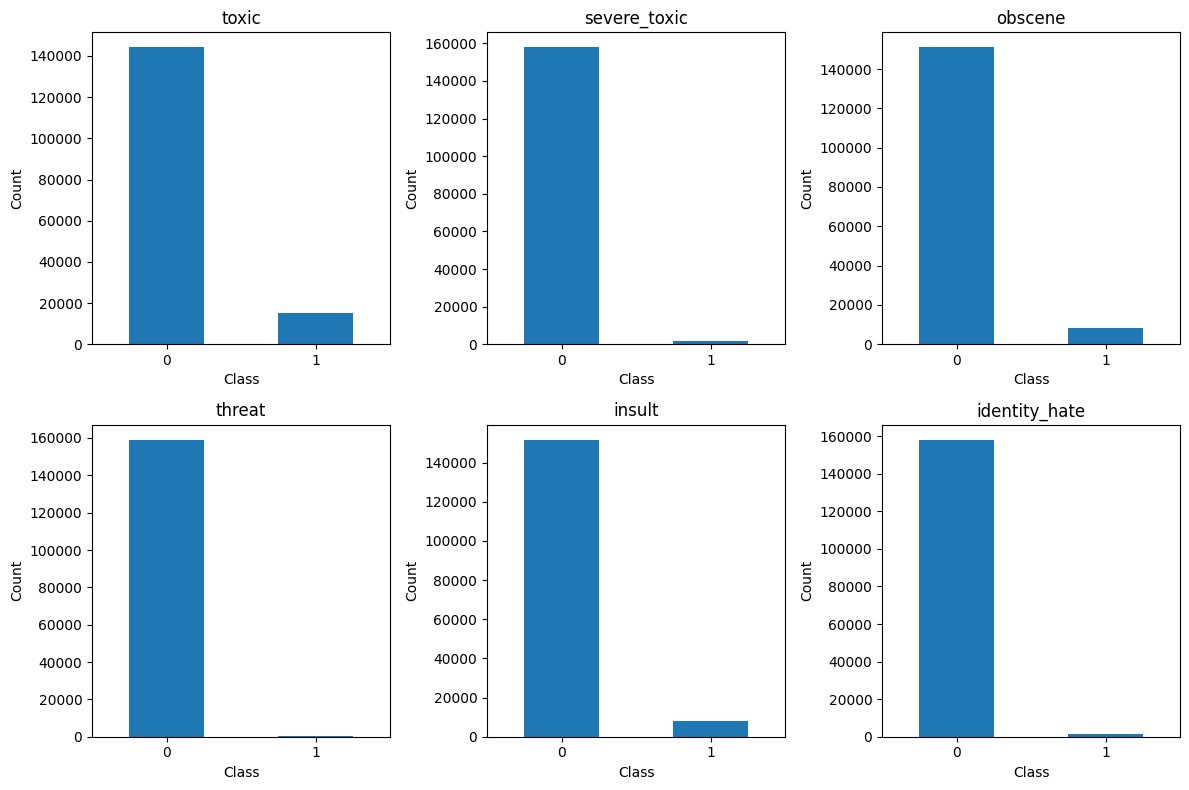

In [ ]:
# Checking label distribution of train data

import matplotlib.pyplot as plt

# Plot class distribution for each target
plt.figure(figsize=(12, 8))

for i, col in enumerate(label_names, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 cols grid
    train[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xticks(rotation=0)
    plt.xlabel("Class")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

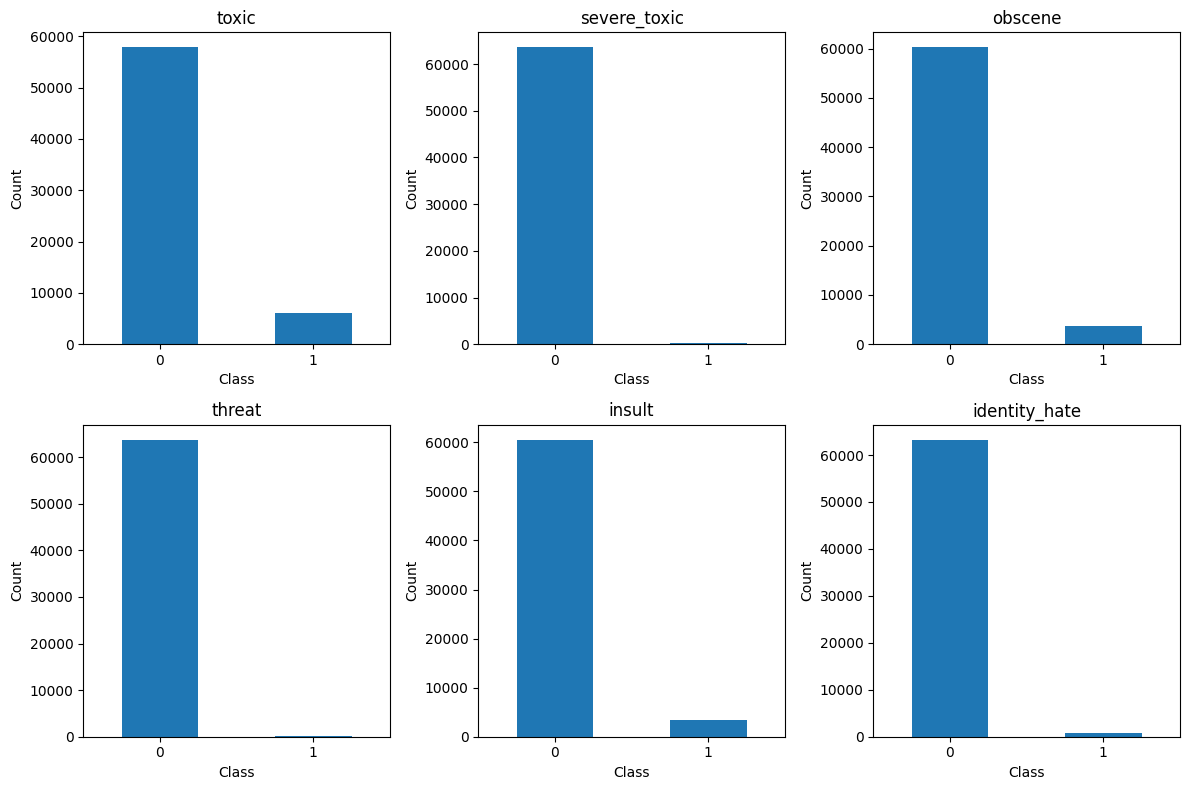

In [ ]:
# Checking distribution of test data

import matplotlib.pyplot as plt

# Plot class distribution for each target
plt.figure(figsize=(12, 8))

for i, col in enumerate(label_names, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 cols grid
    test_labels[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xticks(rotation=0)
    plt.xlabel("Class")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [ ]:
(test_labels == 1).sum() # how many positives per class

,0
id,0
toxic,6090
severe_toxic,367
obscene,3691
threat,211
insult,3427
identity_hate,712


In [ ]:
(test_labels == 0).sum() # how many negatives per class

,0
id,0
toxic,57888
severe_toxic,63611
obscene,60287
threat,63767
insult,60551
identity_hate,63266


# Text preprocessing

In [ ]:
import re
def clean_text(text):
  text = text.lower()
  text = text.replace('\n',' ')

  # Replace URLs / emails / numbers
  text = re.sub(r"http\S+|www\S+", "<url>", text)
  text = re.sub(r"\S+@\S+", "<email>", text)
  text = re.sub(r"\d+", "<num>", text)

  # Normalize repeated characters (e.g., loooool -> loool)
  text = re.sub(r"(.)\1{2,}", r"\1\1", text)  # keep max 2 repeats

  text = re.sub(r"[^a-zA-Z0-9!?.,]", " ", text) # Keep basic punctuation
  text = re.sub(r"\s+", " ", text)  # remove extra spaces
  text = text.strip()
  return text

train['comment_text'] = train['comment_text'].apply(clean_text)
test_comments['comment_text'] = test_comments['comment_text'].apply(clean_text)

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

def get_avg_roc_auc_score(y_test, y_pred_proba):
    aucs = []
    for i, label in enumerate(y_test.columns):
        if isinstance(y_pred_proba, list):  # OneVsRest case
            probs = y_pred_proba[i][:, 1]
        else:  # normal case
            probs = y_pred_proba[:, i]
        auc = roc_auc_score(y_test[label], probs)
        aucs.append(auc)
        print(f"{label}: ROC-AUC = {auc:.4f}")
    return np.mean(aucs)

# Word2vec + Bidirectional LSTM

In [ ]:
import spacy
nlp = spacy.blank("en")
import numpy as np
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping

X_train = train['comment_text'].values
y_train = train.drop(['id','comment_text'],axis=1)

X_test = test_comments['comment_text'].values
y_test = test_labels.drop(['id'],axis=1)

# Tokenize comments.
MAX_WORDS = 50000
MAX_LEN= 200

X_train_tokens = [[token.text for token in nlp(sentence)] for sentence in X_train]
X_test_tokens = [[token.text for token in nlp(sentence)] for sentence in X_test]

# Train Word2Vec model on train data
w2v = Word2Vec(
    sentences=X_train_tokens,
    vector_size=100,
    window=5,
    workers=4,
    epochs=5,
    min_count=5,
    max_final_vocab=MAX_WORDS,
    sg=1
    )

# Convert tokens to indices based on Word2Vec vocabulary
word_to_idx = w2v.wv.key_to_index
X_train_idx = [[word_to_idx[w] for w in sentence if w in word_to_idx] for sentence in X_train_tokens]
X_test_idx  = [[word_to_idx[w] for w in sentence if w in word_to_idx] for sentence in X_test_tokens]

# Pad sequences
X_train_pad = pad_sequences(X_train_idx, maxlen=MAX_LEN, padding='post')
X_test_pad  = pad_sequences(X_test_idx, maxlen=MAX_LEN, padding='post')

# Build embedding matrix
embedding_matrix = np.zeros((len(w2v.wv), w2v.vector_size))
for word, i in word_to_idx.items():
    embedding_matrix[i] = w2v.wv[word]

# BiLSTM model
model = Sequential()
model.add(Embedding(
    input_dim=len(w2v.wv),
    output_dim=w2v.vector_size,
    weights=[embedding_matrix],
    input_length=MAX_LEN,
    trainable=False  # set True to fine-tune embeddings
))

# SpatialDropout1D is used for embeddings/sequence features (3D tensors).
# Use SpatialDropout1D right after embedding
# model.add(SpatialDropout1D(0.3))

model.add(Bidirectional(LSTM(128, return_sequences=False)))

# Whereas Dropout is used for fully connected or pooled features (2D tensors).
model.add(Dropout(0.3))

model.add(Dense(y_train.shape[1], activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["AUC"])

early_stopping = EarlyStopping(monitor='val_AUC', mode='max', patience=2, restore_best_weights=True)
history = model.fit(
    X_train_pad,
    y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=128,
    callbacks=[early_stopping])

y_pred_proba = model.predict(X_test_pad)
y_pred = (y_pred_proba >= 0.5).astype(int)


# Metrics
print("Exact Match Accuracy:", accuracy_score(y_test, y_pred))

mean_auc = get_avg_roc_auc_score(y_test, y_pred_proba)
print(f"\nMean Column-wise ROC-AUC: {mean_auc:.5f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 39s 32ms/step - AUC: 0.8947 - loss: 0.1031 - val_AUC: 0.9737 - val_loss: 0.0554
Epoch 2/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - AUC: 0.9730 - loss: 0.0567 - val_AUC: 0.9794 - val_loss: 0.0535
Epoch 3/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 40s 31ms/step - AUC: 0.9777 - loss: 0.0526 - val_AUC: 0.9809 - val_loss: 0.0487
Epoch 4/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - AUC: 0.9791 - loss: 0.0520 - val_AUC: 0.9829 - val_loss: 0.0475
Epoch 5/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 42s 32ms/step - AUC: 0.9809 - loss: 0.0484 - val_AUC: 0.9824 - val_loss: 0.0474
Epoch 6/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 42s 33ms/step - AUC: 0.9817 - loss: 0.0472 - val_AUC: 0.9842 - val_loss: 0.0460
Epoch 7/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 42s 33ms/step - AUC: 0.9832 - loss: 0.0462 - val_AUC: 0.9826 - val_loss: 0.0470
Epoch 8/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 38s 31ms/step - AUC: 0.9832 - loss: 0.0469 - val_AUC: 0.9831 - val_loss: 0.0449
2000/2000 ━━━━━━━━━━━━━━

**Without Dropout**
- ROC-AUC is 0.97480 .
- Ran till 6 epochs out of 10. ( performing better than LSTM )

**With Dropout**
- With a dropout of 0.3 , Mean Column-wise ROC-AUC is **0.97754**
- With a dropout of 0.5 , Mean Column-wise ROC-AUC is 0.96575

**With SpatialDropout**
- With a SpatialDropout1D of 0.3 , Mean Column-wise ROC-AUC is 0.97521

**With both SpatialDropout and Dropout**
- With a SpatialDropout1D of 0.3 and a dropout of 0.3, Mean Column-wise ROC-AUC is 0.96029

- With a SpatialDropout1D of 0.3 and a dropout of 0.1, Mean Column-wise ROC-AUC is 0.97696